## Compare ML Regression Project <a name="3"></a>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/LivingAbalone.JPG/1024px-LivingAbalone.JPG" width="400">

The age of abalone is determined by cutting the shell, staining it, and counting the number of rings through a microscope - a tedious and time-consuming task! It would be hepful if abalone age could be predicted using other, easier to measure variables. A dataset of abalone age and various other features has been compiled and has been made available by the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/abalone). This data is named `abalone_age.csv` and consists of 8 features and 1 response variable:

- Sex (M, F, I (infant))
- Length (mm)
- Diameter (mm)
- Height (mm)
- Whole weight (grams)
- Shucked weight (grams)
- Viscera weight (grams)
- Shell weight (grams)
- Rings (+1.5 to the number of rings gives the age of the abalone in years)

I will use scikit-learn to apply a `LinearRegression`, `SVR`, `KNeighborsRegressor` and `RandomForestRegressor` to predict abalone age based on the 8 input features.

In [13]:
# import packages

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBClassifier
import xgboost as xgb

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [98]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_hastie_10_2
features, target = datasets.make_hastie_10_2(random_state=123)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import sklearn 
from sklearn.neighbors import KNeighborsRegressor
import altair as alt

In [55]:
abalone_df = pd.read_csv('abalone_age.csv')
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [56]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [57]:
# create X and y to split

X = abalone_df.drop(columns='Rings')
y = abalone_df[['Rings']]
y = y+1.5
y = y.to_numpy().ravel()
y

array([16.5,  8.5, 10.5, ..., 10.5, 11.5, 13.5])

In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

In [59]:
# Split the features into numeric features and categorical features
numeric_features = ['Length', 'Diameter', 'Height',
                    'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight' ]
categorical_features = ['Sex']

In [60]:
# Create the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numeric_features),
        ('ohe', OneHotEncoder(drop="first"), categorical_features)])

In [61]:
# Apply data transformations and convert back to dataframe
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
                       index=X_train.index,
                       columns=(numeric_features +
                                list(preprocessor.named_transformers_['ohe']
                                     .get_feature_names(categorical_features))))
X_test = pd.DataFrame(preprocessor.transform(X_test),
                      index=X_test.index,
                      columns=X_train.columns)

In [62]:
# LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_predict_lr))

In [63]:
# SVR
gsc_svr = GridSearchCV(
        SVR(),
        param_grid={
            'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 10, 100]},
        cv=5, scoring = 'neg_mean_squared_error')

grid_result_svr = gsc_svr.fit(X_train, y_train)
best_params_svr = grid_result_svr.best_params_
y_predict_svr = grid_result_svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_predict_svr))

In [64]:
# KNeighborsRegressor

gsc_knn = GridSearchCV(
        KNeighborsRegressor(),
        param_grid={
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17,18,19,20]},
        cv=5, scoring = 'neg_mean_squared_error')

grid_result_knn = gsc_knn.fit(X_train, y_train)
best_params_knn = grid_result_knn.best_params_
y_predict_knn = grid_result_knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_predict_knn))

In [65]:
# RandomForestRegressor

gsc_rf = GridSearchCV(
        RandomForestRegressor(),
        param_grid={
            'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]},
        cv=5, scoring = 'neg_mean_squared_error')

grid_result_rf = gsc_rf.fit(X_train, y_train)
best_params_rf = grid_result_rf.best_params_
y_predict_rf = grid_result_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_predict_rf))


In [73]:
print('LinearRegression uses default hyperparameters')
print("SVR's best hypyterparameter is: " + str(best_params_svr))
print("KNeighborsRegressor's best hypyterparameter is: " + str(best_params_knn))
print("RandomForestRegressor's best hypyterparameter is: " + str(best_params_rf))

LinearRegression uses default hyperparameters
SVR's best hypyterparameter is: {'gamma': 0.2}
KNeighborsRegressor's best hypyterparameter is: {'n_neighbors': 12}
RandomForestRegressor's best hypyterparameter is: {'n_estimators': 130}


In [68]:
print(f"LinearRegression test error: {rmse_lr:.3f}")
print(f"SVR test error: {rmse_svr:.3f}")
print(f"KNeighborsRegressor test error: {rmse_knn:.3f}")
print(f"RandomForestRegressor test error: {rmse_rf:.3f}")

LinearRegression test error: 2.136
SVR test error: 2.118
KNeighborsRegressor test error: 2.190
RandomForestRegressor test error: 2.139


In [69]:
df_3= pd.DataFrame(y_test)
df_3.columns = ['actual_value']

In [70]:
df_3['linear_regression'] = y_predict_lr
df_3['svr'] = y_predict_svr
df_3['kneighbors_regressor'] = y_predict_knn
df_3['randomforest_regressor'] = y_predict_rf

In [71]:
df_3 = df_3.melt(id_vars= 'actual_value', value_vars=['linear_regression','svr','kneighbors_regressor','randomforest_regressor'],
         var_name='model', value_name='predicted_value')


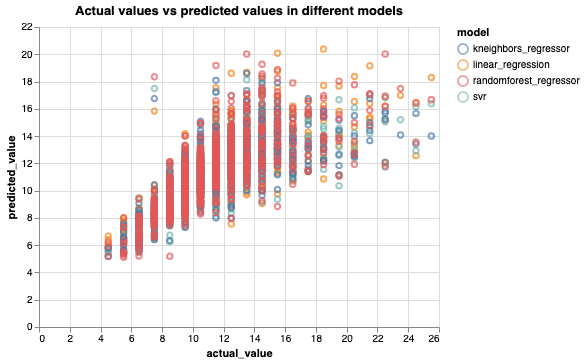

In [72]:
alt.Chart(df_3).mark_point().encode(
    alt.X('actual_value:Q'),
    alt.Y('predicted_value:Q'),
    color='model'
).properties(title = 'Actual values vs predicted values in different models')



SVR has the lowest test error, but there are not huge differences between these 4 models.

Some thoughts:

1. we can perform feature selection/engineering, there are 4 features all relate to `weight`, probably we can find a way to better extract information from those features.

2. Using boosted regression method may help, boosted methods generally give better performance.

3. Deal with outliers. 